# Import Moduals

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import NeuralNetwork

from keras.utils import to_categorical
from keras.metrics import CategoricalAccuracy
from keras.losses import MeanSquaredError
from keras.initializers import GlorotUniform

from importlib import reload

metrics = CategoricalAccuracy()

# Preprocessing

In [2]:
# import dataset
from keras.datasets import mnist
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# Keras Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

def keras_fit(x_train, y_train, x_test, y_test, input_size, hidden_units, batch_size, dropout_probability, num_labels, epoch):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_size, use_bias=False))
    model.add(Dropout(dropout_probability))
    #model.add(Dense(hidden_units, use_bias=False))
    #model.add(Dropout(0.45))
    model.add(Dense(num_labels, use_bias=False))
    model.compile(loss=MeanSquaredError(), 
                optimizer=SGD(learning_rate=0.01),
                metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size)
    y_hat = model.predict(x_test)
    metrics.update_state(y_test, y_hat)
    return(metrics.result().numpy())

In [72]:
batch_size = 256
hidden_units = 256
epoch = 5
dropout_probability = 0.8265522131696343
print("Keras Model")
print("\nAccuracy: " + str(keras_fit(x_train, y_train, x_test, y_test, input_size, hidden_units, batch_size, dropout_probability, num_labels, epoch)))

Keras Model
Epoch 1/5
235/235 [==============================] - 1s 2ms/step - loss: 0.7669 - accuracy: 0.1572
Epoch 2/5
235/235 [==============================] - 1s 2ms/step - loss: 0.3971 - accuracy: 0.2301
Epoch 3/5
235/235 [==============================] - 1s 2ms/step - loss: 0.2810 - accuracy: 0.2771
Epoch 4/5
235/235 [==============================] - 1s 2ms/step - loss: 0.2173 - accuracy: 0.3246
Epoch 5/5
313/313 [==============================] - 0s 873us/step

Accuracy: 0.7845333


# Standard Model

In [7]:
reload(NeuralNetwork)
from NeuralNetwork import MyModel, MyLayer
# The function can fit a model and return accuracy of test data
def f(x_train, y_train, x_test, y_test, model, batch_size, epoches, weight = None, progress = True, reset = True):
    metrics = CategoricalAccuracy()
    if(weight is not None):
        model.setWeight(weight)
    model.fit(x_train, y_train, 0.01, epoches = epoches, batch_size = batch_size, progress = progress)
    y_hat = model.predict(x_test)
    metrics.reset_state()
    metrics.update_state(y_test, y_hat)
    if(reset):
        model.reset()
    return metrics.result().numpy()

In [4]:
batch_size = 128
hidden_units = 128
epoch = 5
dropout_probability = 0.5

standard = MyModel()
standard.addLayer(MyLayer(input_size, hidden_units))
standard.addLayer(MyLayer(hidden_units, num_labels))
# standard deep learning
print("Standard Deep Learning")
print("\nAccuracy: " + str(f(x_train, y_train, x_test, y_test, standard, batch_size, epoches = epoch, progress = True)))
standard.reset()

Standard Deep Learning


Epoch  1: 100% |██████████| 469/469, Accuracy: 0.4402, Loss: 0.0908;
Epoch  2: 100% |██████████| 469/469, Accuracy: 0.6730, Loss: 0.0758;
Epoch  3: 100% |██████████| 469/469, Accuracy: 0.7328, Loss: 0.0683;
Epoch  4: 100% |██████████| 469/469, Accuracy: 0.7618, Loss: 0.0635;
Epoch  5: 100% |██████████| 469/469, Accuracy: 0.7805, Loss: 0.0602;



Accuracy: 0.7943


In [ ]:
accuracy_standard = [f(x_train, y_train, x_test, y_test, standard, batch_size, epoches = epoch, progress = False) for i in range(50)]

# Deep Learning with Dropout

In [78]:
reload(NeuralNetwork)
from NeuralNetwork import MyModel, MyLayer
batch_size = 1
hidden_units = 256
epoch = 1
dropout_probability = 0.8265522131696343
# Dropout Deep Neural Network
dropout = MyModel()
dropout.addLayer(MyLayer(input_size, hidden_units, dropout = True, dropout_probability = dropout_probability))
dropout.addLayer(MyLayer(hidden_units, num_labels))
# standard dropout
print("Deep Learning with Dropout")
print("\nAccuracy: " + str(f(x_train, y_train, x_test, y_test, dropout, batch_size, epoches = epoch, progress = True)))
dropout.reset()

Deep Learning with Dropout


Epoch  1: 100% |██████████| 60000/60000, Accuracy: 0.7099, Loss: 0.0413;



Accuracy: 0.8392


In [26]:
accuracy_dropout = [f(x_train, y_train, x_test, y_test, dropout, batch_size, epoches = epoch, progress = False) for i in range(50)]

# LSH Model

In [80]:
# no rate training
# mask rate

reload(NeuralNetwork)
from NeuralNetwork import MyModel, MyLayer
batch_size = 1
hidden_units = 256
epoch = 1
function_num = 5
table_num = 6
# Deep Neural Network with LSH dropout
LSH = MyModel()
LSH.addLayer(MyLayer(input_size, hidden_units, dropout_lsh = True, function_num=function_num, table_num=table_num))
LSH.addLayer(MyLayer(hidden_units, num_labels))
# LSH dropout
print("Deep Learning with LSH Dropout")
print("\nAccuracy: " + str(f(x_train, y_train, x_test, y_test, LSH, batch_size, epoches = epoch, progress = True)))
LSH.reset()

Deep Learning with LSH Dropout


Epoch  1: 100% |██████████| 60000/60000, Accuracy: 0.8039, Loss: 0.0504;



Accuracy: 0.8313


In [5]:
# no rate training
# mask

reload(NeuralNetwork)
from NeuralNetwork import MyModel, MyLayer
batch_size = 1
hidden_units = 256
epoch = 1
function_num = 5
table_num = 6
# Deep Neural Network with LSH dropout
LSH = MyModel()
LSH.addLayer(MyLayer(input_size, hidden_units, dropout_lsh = True, function_num=function_num, table_num=table_num))
LSH.addLayer(MyLayer(hidden_units, num_labels))
# LSH dropout
print("Deep Learning with LSH Dropout")
print("\nAccuracy: " + str(f(x_train, y_train, x_test, y_test, LSH, batch_size, epoches = epoch, progress = True)))
LSH.reset()

Deep Learning with LSH Dropout


Epoch  1: 100% |██████████| 60000/60000, Accuracy: 0.8108, Loss: 0.0412;



Accuracy: 0.8729


In [6]:
# no rate training
# no mask and no rate prediction

reload(NeuralNetwork)
from NeuralNetwork import MyModel, MyLayer
batch_size = 1
hidden_units = 256
epoch = 1
function_num = 5
table_num = 6
# Deep Neural Network with LSH dropout
LSH = MyModel()
LSH.addLayer(MyLayer(input_size, hidden_units, dropout_lsh = True, function_num=function_num, table_num=table_num))
LSH.addLayer(MyLayer(hidden_units, num_labels))
# LSH dropout
print("Deep Learning with LSH Dropout")
print("\nAccuracy: " + str(f(x_train, y_train, x_test, y_test, LSH, batch_size, epoches = epoch, progress = True)))
LSH.reset()

Deep Learning with LSH Dropout


Epoch  1: 100% |██████████| 60000/60000, Accuracy: 0.8040, Loss: 0.0767;



Accuracy: 0.8401


In [8]:
#  rate training
#  no rate prediction

reload(NeuralNetwork)
from NeuralNetwork import MyModel, MyLayer
batch_size = 1
hidden_units = 256
epoch = 1
function_num = 5
table_num = 6
# Deep Neural Network with LSH dropout
LSH = MyModel()
LSH.addLayer(MyLayer(input_size, hidden_units, dropout_lsh = True, function_num=function_num, table_num=table_num))
LSH.addLayer(MyLayer(hidden_units, num_labels))
# LSH dropout
print("Deep Learning with LSH Dropout")
print("\nAccuracy: " + str(f(x_train, y_train, x_test, y_test, LSH, batch_size, epoches = epoch, progress = True)))

Deep Learning with LSH Dropout


Epoch  1: 100% |██████████| 60000/60000, Accuracy: 0.8149, Loss: 0.0498;



Accuracy: 0.8543


In [121]:
accuracy_LSH = [f(x_train, y_train, x_test, y_test, LSH, batch_size, epoches = epoch, progress = False) for i in range(1)]

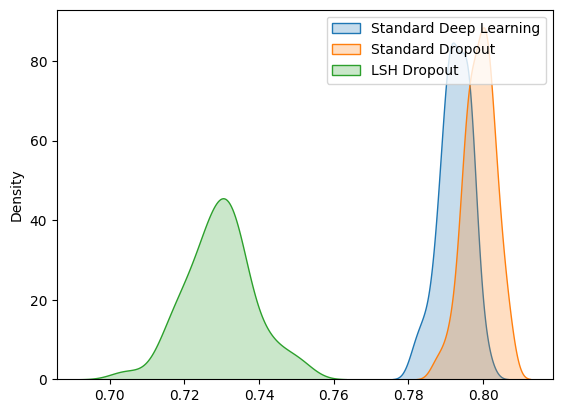

In [29]:
sns.kdeplot(accuracy_standard, fill=True, label="Standard Deep Learning")
sns.kdeplot(accuracy_dropout, fill=True, label="Standard Dropout")
sns.kdeplot(accuracy_LSH, fill=True, label="LSH Dropout")
plt.legend()
plt.show()

<Axes: ylabel='Density'>

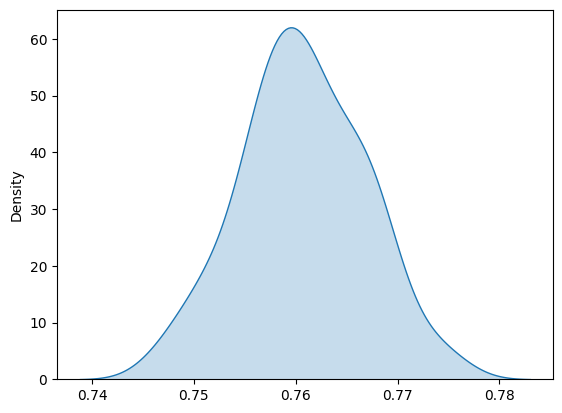

In [114]:
sns.kdeplot(accuracy_LSH, fill=True, label="Standard Deep Learning")